In [1]:
# pip install -r requirements.txt


[notice] A new release of pip is available: 24.0 -> 24.1.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
# %matplotlib notebook
#%matplotlib inline
import numpy as np
import sympy
import casadi
import modules as M
import os
import matplotlib.pyplot as plt

colorsBlue = ['#b3e5fc', '#0091ea']
colorsRed = ['#f18e86', '#e83b47']
colors = [colorsBlue, colorsRed]

# Running the Simulation

In [3]:
m = 5
casadi_EOM, x, u = M.get_casadi_EOM(m)
energy_EQN = M.energy(m)

print(*casadi_EOM)

ode = {}
ode['x'] = x
ode['p'] = u
ode['ode'] = casadi.vertcat(*casadi_EOM)

dt = 1e-2
t = np.arange(0, dt * 2000, dt)

F = casadi.integrator('F','cvodes', ode, 0, t)

vertsplit(vertcat(s, u)){3} vertsplit(vertcat(s, u)){4} vertsplit(vertcat(s, u)){5} @1=vertsplit(vertcat(s, u)), @2=@1{8}, @3=@1{3}, @4=@1{1}, (((((-40*@2)*@1{9})*@3)+((2.*@1{4})*((((-5*@2)*@3)*(1+((4*@2)/tan(@4))))+((7*@1{5})/sin(@4)))))/(7+(20*sq(@2)))) @1=vertsplit(vertcat(s, u)), @2=@1{8}, @3=@1{3}, @4=@1{1}, @5=@1{5}, (-((((((((((-5*sq(@2))*sq(@3))*sin((2.*@4)))+((10*@2)*(((((2.*@1{9})*@1{4})+((@5*@3)*cos(@4)))+(sq(@3)*cos((2.*@4))))-sin(@4))))+(10*u))+(((14*@5)*@3)*sin(@4)))+(((3*sq(@3))*sin(@4))*cos(@4)))+((5*sq(@3))*sin((2.*@4))))+(12*cos(@4)))/(13+(10*sq(@2))))) @1=vertsplit(vertcat(s, u)), @2=@1{3}, @3=@1{8}, @4=@1{1}, (((((20*@1{9})*@2)*(((4*@3)*cos(@4))+sin(@4)))+((@1{4}*(((4*@1{5})*(((5*@3)*sin(@4))-(7*cos(@4))))+((2.*@2)*((((5*sq(@3))*(7+cos((2.*@4))))+((10*@3)*sin((2.*@4))))+(13*sq(sin(@4)))))))/sin(@4)))/(14+(40*sq(@3)))) @1=vertsplit(vertcat(s, u)), @2=@1{0}, @3=@1{1}, (((@1{4}*sin(@2))*sin(@3))-((@1{5}+(@1{3}*cos(@3)))*cos(@2))) @1=vertsplit(vertcat(s, u)), @2=@1{1}, 

In [6]:
# Stable general mode. inputs are: theta0, psi1 (cannot be 0!), m, and c0

x0 = M.get_stable_mode(np.pi/2 - 0.5, 0.5, m, 0.4)
print(x0)

[0, 1.0707963267948966, 0, 0.5, 0, -0.408560837331135, 0, 0, 0.4, 0]


In [4]:
# Stable travelling mode

x0 = [0, np.pi/2 - 0.6, 0,
      0,0,3,
      0,0,
      0.820964,0]

print(x0)

[0, 0.9707963267948966, 0, 0, 0, 3, 0, 0, 0.820964, 0]


In [ ]:
# Stable spinning mode

x0 = [0, np.pi/2 - 0.3, 0,
      0.815932,0,0,
      0,0,
      0.38,0]

print(x0)

In [5]:
res = F(x0 = x0, p = 0)
# print(res["xf"])
traj_ss = np.array(res["xf"]).T # ss = stable state
# print(traj_ss)

traj_CT = []
traj_GC = []
traj_EE = []
for i in range(len(traj_ss)):
    traj_CT.append(M.CT(traj_ss[i]))
    traj_GC.append(M.GC(traj_ss[i]))
    traj_EE.append(energy_EQN(*traj_ss[i])) # EE might be the energy expressed in terms of the trajectory in the lab frame
traj_CT = np.array(traj_CT)
traj_GC = np.array(traj_GC)
traj_EE = np.array(traj_EE)

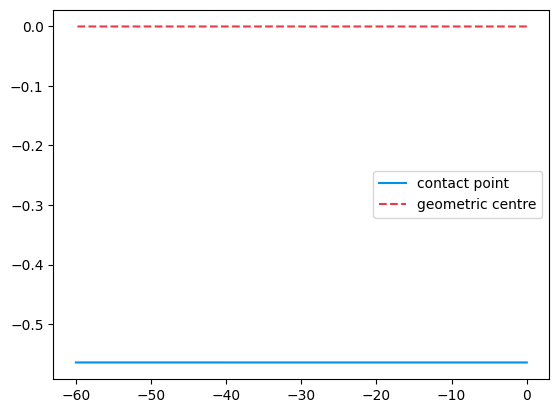

In [10]:
# plot the ConTact point trajectory and the Geometric Centre trajectory
# plt.axes().set_aspect(1)
plt.plot(traj_CT.T[0], traj_CT.T[1], color = colors[0][1], label = 'contact point')
plt.plot(traj_GC.T[0], traj_GC.T[1], color = colors[1][1], linestyle = 'dashed', label = 'geometric centre')

plt.legend()

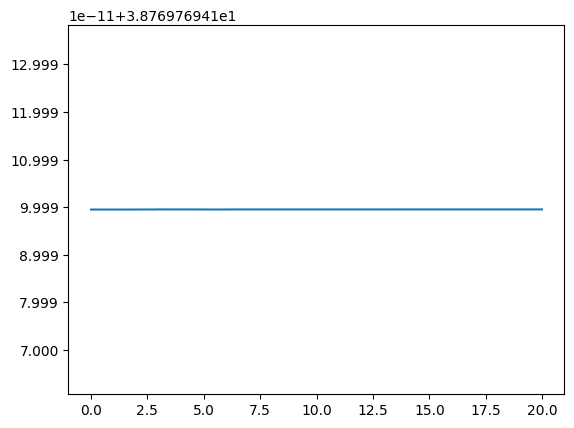

In [11]:
# plot the energy over time
plt.figure()
plt.plot(np.arange(0,dt*(len(traj_ss) - 0.5),dt), traj_EE)
plt.savefig("")

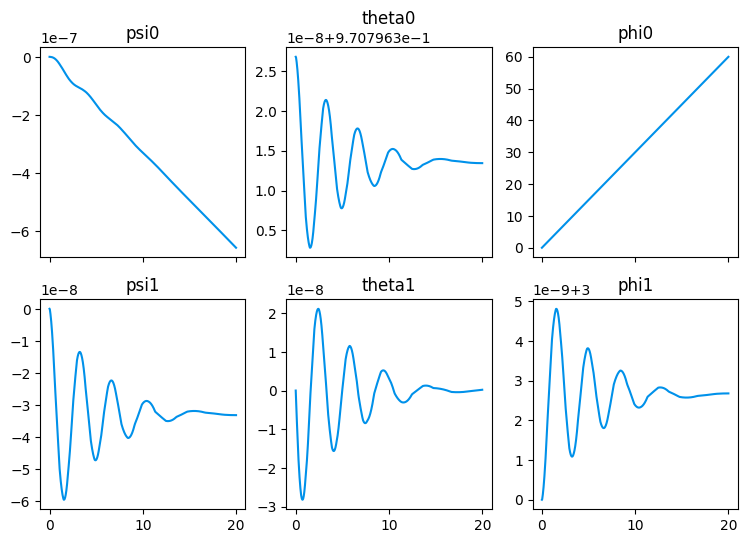

In [12]:
# plots of Euler angles and angular velocities

fig, axes = plt.subplots(2, 3, figsize = (9, 6), sharex = True)
axes = np.reshape(axes, -1)

qty = ['psi0', 'theta0', 'phi0', 'psi1', 'theta1', 'phi1']

for i in range(6):
    axes[i].plot(np.arange(0,dt*(len(traj_ss) - 0.5),dt), traj_ss.T[i], color = colors[0][1])
    axes[i].set_title(qty[i])

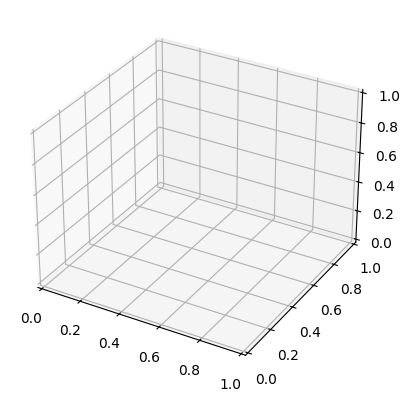

In [17]:
ax = plt.figure().add_subplot(projection='3d')

os.makedirs('frames', exist_ok = True)
skip_N = 20

for i in range(len(traj_ss)):

    if i % skip_N == 0:
        print("Progress: {0:.1f}%".format(100 * i/len(traj_ss)), end = '\r')

        M.DrawCircle(ax, traj_ss[i])

        ax.plot(np.array(traj_GC[:i,0]),
                np.array(traj_GC[:i,1]),
                np.array(traj_GC[:i,2]),
                color = 'red', zorder = 1)

        ax.plot(np.array(traj_CT[:i,0]),
                np.array(traj_CT[:i,1]),
                np.array(traj_CT[:i,2]),
                color = 'black', zorder = 1)

        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('z')

        ax.set_xlim(traj_GC[i,0] - 3, traj_GC[i,0] + 3)
        ax.set_ylim(traj_GC[i,1] - 3, traj_GC[i,1] + 3)
        #ax.set_xlim(- 4, + 4)
        #ax.set_ylim(- 4, + 4)
        ax.set_zlim(0, 6)

        plt.savefig('/Users/adampearl/Desktop/cyr-wheel/Control/frames/stable/{0:05d}.png'.format(i//skip_N)) #Adam

        ax.clear()